# Behavior across weeks and hours
## Questions:
* ### How are orders distributed across the week?  
* ### How are orders distributed across the day?
* ### How are orders distributed across the week/day?
* ### Are there differences across regions?
* ### Has this behavior changed in time?

## Data retrieval
For information about the origin db and table refer to:

In [6]:
import mysql.connector
import constants as c
import pandas as pd

connection = mysql.connector.connect(host='localhost',
                                            database=c.database_name,
                                            user=c.database_username,
                                            password=c.database_password)

sql_select_Query = f"""SELECT nazione, area, date, year, month, hour, weekday, COUNT(DISTINCT ID) as n_orders 
                        FROM {c.schema}.dataset
                        GROUP BY nazione, area, date, year, month, hour, weekday"""
cursor = connection.cursor()
cursor.execute(sql_select_Query)
column_names = [i[0] for i in cursor.description]
records = cursor.fetchall()

connection.close()
cursor.close()

dataset = pd.DataFrame(records, columns = column_names)
dataset.head()

,nazione,area,DATE(date),year,month,hour,weekday,n_orders
0,CH,None,2023-10-23,2023,10,12,Monday,1
1,CH,None,2023-12-06,2023,12,17,Wednesday,1
2,CH,None,2023-12-14,2023,12,20,Thursday,1
3,CH,None,2023-12-23,2023,12,18,Saturday,1
4,CH,None,2023-12-26,2023,12,12,Tuesday,1


## Data analysis

In [12]:
from datetime import datetime
date = datetime.strptime('2024-01-16 21:00:03', '%y-%m-%d %H:%M:%S')

ValueError: time data '2024-01-16 21:00:03' does not match format '%y-%m-%d %H:%M:%S'

### How are orders distributed across the week?  

In [2]:
%matplotlib ipympl
import matplotlib.pyplot as plt

     weekday  n_orders
0     Friday  1.000000
1     Monday  1.032258
2   Saturday  1.083333
3     Sunday  1.133333
4   Thursday  1.062500
5    Tuesday  1.043478
6  Wednesday  1.085714


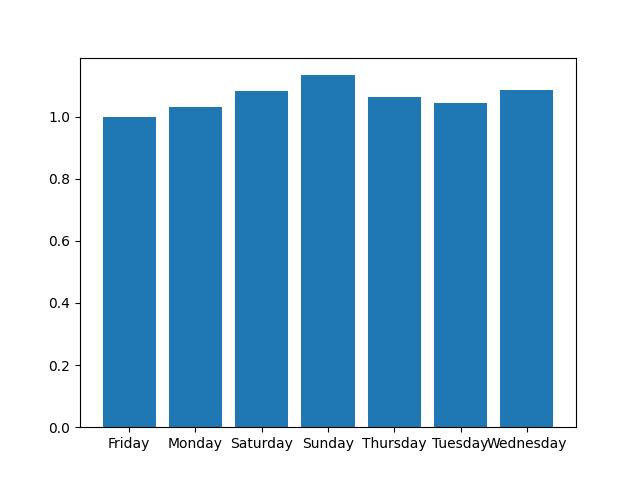

In [3]:
weekday_trends = dataset.groupby('weekday')['n_orders'].mean().reset_index()
print(weekday_trends)
plot = plt.bar(weekday_trends['weekday'], weekday_trends['n_orders'])
plt.show()

In [56]:
#plt.figure(figsize=(9,4))
#bars = plt.boxplot(dataset['weekday','n_orders'])

#plt.title('Average Age by Department')
#plt.show()
ax=add_subplot(111)
lista=[]
axis=[]
for value in dataset['weekday'].unique():
    axis.append(value)
    lista.append(dataset[dataset['weekday']==value]['n_orders'].to_list())
print(lista) 
print(axis)
bars = plt.boxplot(lista)
ax.set_xticklabels(axis)
plt.title('Average Age by Department')
plt.show()

NameError: name 'add_subplot' is not defined